In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
plt.ion()
plt.rcParams['figure.figsize'] = 10, 8

In [58]:
sigma = 5.1 # mean incubation period
eta = 4 # avg time between symptoms and hospitalization
delta = 59 # avg time between hospitalization and death
beta = 30 # transmission rate
gamma = 1 / 0.088 # avg curation time (with symptoms)
lmbda = 1 / 0.088 # avg curation time (no symptoms)
rho = 0.095 # proba of dying due to virus
mu = 0.93 # amount of non-symptom cases

In [59]:
N = 11920000 # moscow population (example)

In [60]:
def f(y, t):
    Xi = y[0] # susceptible
    Vi = y[1] # exposed
    Wi = y[2] # non-symptomatial
    Yi = y[3] # symptomatical (non-hospitalized)
    Ui = y[4] # hospitalized
    Zi = y[5] # removed
    f0 = -beta * Xi * (Wi + Yi + Ui) / N
    f1 = beta * Xi * (Wi + Yi + Ui) / N - (1 / sigma) * Vi
    f2 = (1 / sigma) * mu * Vi - (1 / lmbda) * Wi
    f3 = (1 / sigma) * (1 - mu) * Vi - 0.87 * (1 / gamma) * Yi - (1 / eta) * Yi * 0.13
    f4 = 0.13 * eta * Yi - gamma * Ui / (1 - rho)
    f5 = (1 / lmbda) * Wi + 0.87 * (1 / gamma) * Yi + (1 / gamma) * Ui
    return [f0, f1, f2, f3, f4, f5]

In [61]:
X_0 = N - 1
V_0 = 0
W_0 = 0
Y_0 = 1
U_0 = 0
Z_0 = 0

In [62]:
t = np.linspace(0, 20, 500)
y0 = [X_0, V_0, W_0, Y_0, U_0, Z_0]

In [63]:
soln = odeint(f, y0, t)

In [64]:
X = soln[:, 0]
V = soln[:, 1]
W = soln[:, 2]
Y = soln[:, 3]
U = soln[:, 4]
Z = soln[:, 5]

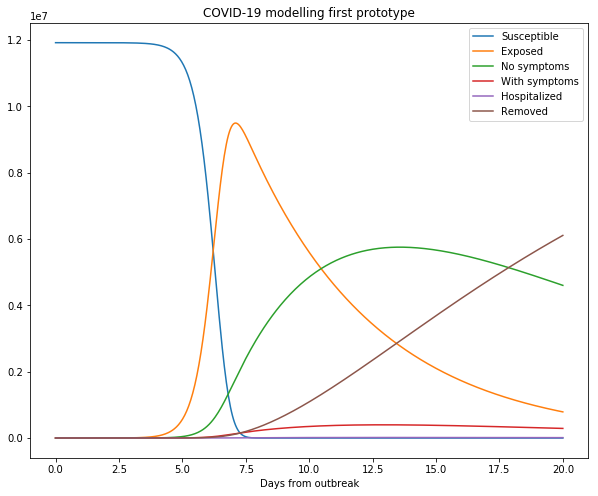

In [65]:
plt.figure()
plt.plot(t, X, label='Susceptible')
plt.plot(t, V, label='Exposed')
plt.plot(t, W, label='No symptoms')
plt.plot(t, Y, label='With symptoms')
plt.plot(t, U, label='Hospitalized')
plt.plot(t, Z, label='Removed')
plt.xlabel('Days from outbreak')
plt.title('COVID-19 modelling first prototype')
plt.legend(loc=0)

In [66]:
print('Finally dead: ', N - Z[499] - X[499] - V[499] - U[499] - W[499] - Y[499])

Finally dead:  117455.96990437235


In [91]:
# beta = 30 кажется ту мач, обычно намного меньше, тут я прям апокалипсис смоделировал
# давайте выставим beta = 3, это более реалистично
# также поменяем смертность на 0.05 (так в мире, 0.95 российская цифра)
# заодно увеличим период до 40 дней

In [95]:
beta = 5
rho = 0.05
t = np.linspace(0, 40, 1000)

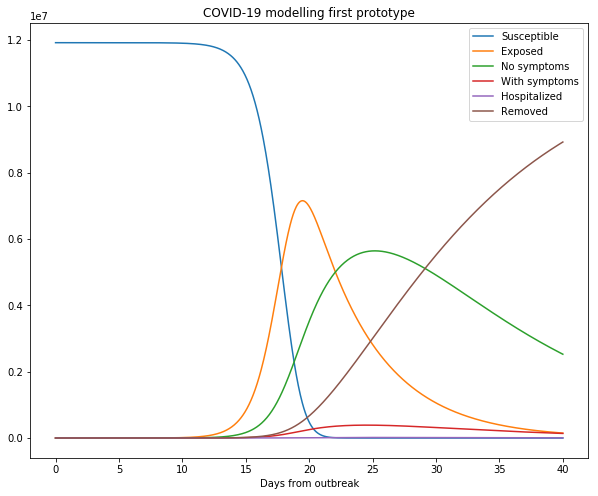

In [96]:
soln = odeint(f, y0, t)
X = soln[:, 0]
V = soln[:, 1]
W = soln[:, 2]
Y = soln[:, 3]
U = soln[:, 4]
Z = soln[:, 5]
plt.figure()
plt.plot(t, X, label='Susceptible')
plt.plot(t, V, label='Exposed')
plt.plot(t, W, label='No symptoms')
plt.plot(t, Y, label='With symptoms')
plt.plot(t, U, label='Hospitalized')
plt.plot(t, Z, label='Removed')
plt.xlabel('Days from outbreak')
plt.title('COVID-19 modelling first prototype')
plt.legend(loc=0)

In [98]:
print('Finally dead: ', N - Z[999] - X[999] - V[999] - U[999] - W[999] - Y[999])

Finally dead:  174128.6765012449
